---
title: "one-sample t test"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


## Question

I measured the height of 10 adult men. Were they sampled from the general population of men?

## Hypotheses

- Null hypothesis: The sample mean is equal to the population mean. In this case, the answer would be "yes"
- Alternative hypothesis: The sample mean is not equal to the population mean. Answer would be "no".
- Significance level: 0.05

In [1]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from scipy.stats import norm, ttest_1samp, t
# %matplotlib widget

In [2]:
#| code-summary: "load data"
df_boys = pd.read_csv('../archive/data/height/boys_height_stats.csv', index_col=0)
mu_boys = df_boys.loc[20.0, 'mu']
sigma_boys = df_boys.loc[20.0, 'sigma']

Let's start with a sample of 10.

In [3]:
#| code-summary: "generate data"
N = 10
# set scipy seed for reproducibility
np.random.seed(314)
sample10 = norm.rvs(size=N, loc=mu_boys+2, scale=sigma_boys)

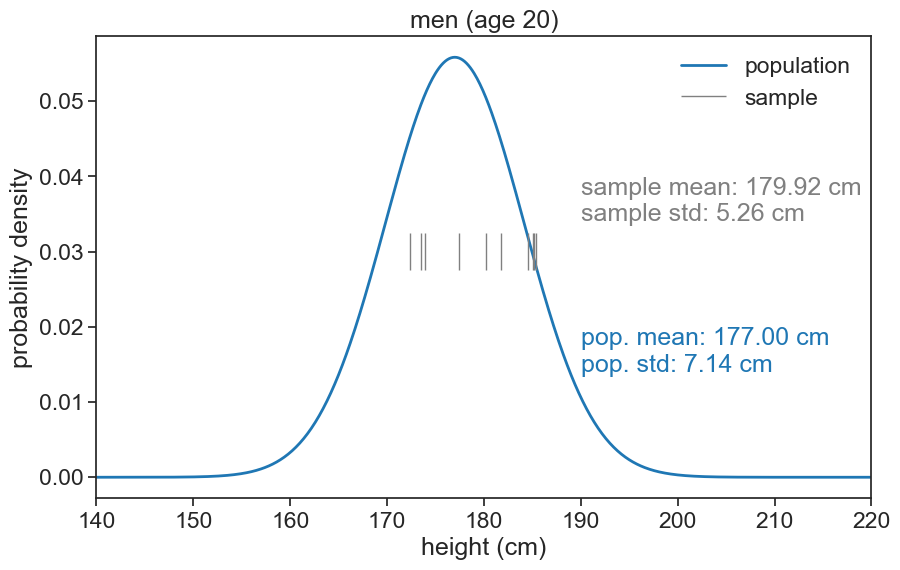

In [4]:
#| code-summary: "plot sample against population pdf"
height_list = np.arange(140, 220, 0.1)
pdf_boys = norm.pdf(height_list, loc=mu_boys, scale=sigma_boys)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(height_list, pdf_boys, lw=2, color='tab:blue', label='population')

ax.eventplot(sample10, orientation="horizontal", lineoffsets=0.03,
             linewidth=1, linelengths= 0.005,
             colors='gray', label='sample')

ax.text(190, 0.04, 
       f"sample mean: {sample10.mean():.2f} cm\nsample std: {sample10.std(ddof=1):.2f} cm", 
       ha='left', va='top', color='gray')

ax.text(190, 0.02, 
       f"pop. mean: {mu_boys:.2f} cm\npop. std: {sigma_boys:.2f} cm", 
       ha='left', va='top', color='tab:blue')

ax.legend(frameon=False)
ax.set(xlabel='height (cm)',
       ylabel='probability density',
       title="men (age 20)",
       xlim=(140, 220),
       );

The t value is calculated as follows:
$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

where

* $\bar{x}$: sample mean
* $\mu$: population mean
* $s$: sample standard deviation
* $n$: sample size

Let's try the formula above and compare it with scipy's ttest_1samp function.

In [5]:
#| code-summary: "calculate t-value"
t_value_formula = (sample10.mean() - mu_boys) / (sample10.std(ddof=1) / np.sqrt(N))
t_value_scipy = ttest_1samp(sample10, popmean=mu_boys)
print(f"t-value (formula): {t_value_formula:.3f}")
print(f"t-value (scipy): {t_value_scipy.statistic:.3f}")

t-value (formula): 1.759
t-value (scipy): 1.759


Let's convert this t value to a p value. It is easy to visualize the p value by ploting the pdf for the t distribution. The p value is the area under the curve for t greater than the t value and smaller than the negative t value.

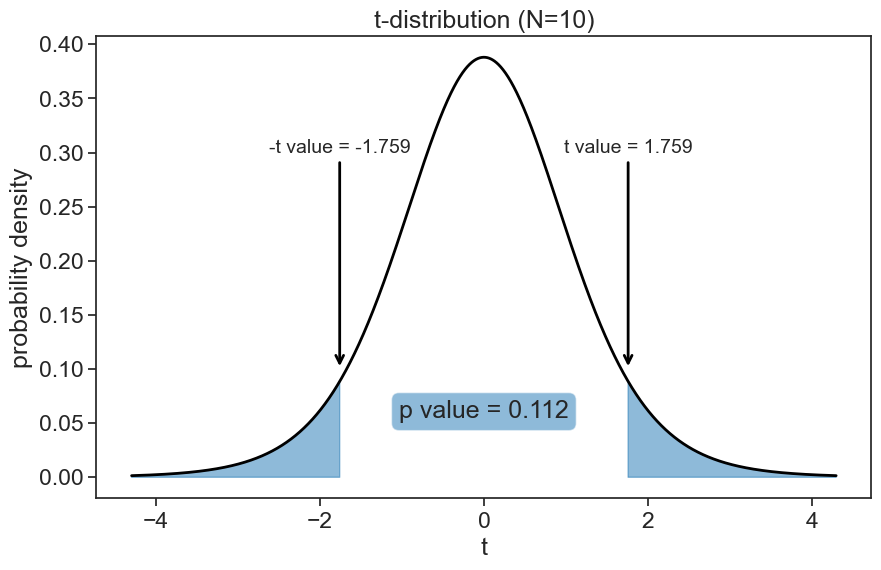

In [6]:
#| code-summary: "visualize t-distribution"
# degrees of freedom
dof = N - 1
fig, ax = plt.subplots(figsize=(10, 6))

t_array_min = np.round(t.ppf(0.001, dof),3)
t_array_max = np.round(t.ppf(0.999, dof),3)
t_array = np.arange(t_array_min, t_array_max, 0.001)

# annotate vertical array at t_value_scipy
ax.annotate(f"t value = {t_value_scipy.statistic:.3f}",
                        xy=(t_value_scipy.statistic, 0.10),
                        xytext=(t_value_scipy.statistic, 0.30),
                        fontsize=14,
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'),
                        ha='center')
ax.annotate(f"-t value = -{t_value_scipy.statistic:.3f}",
                        xy=(-t_value_scipy.statistic, 0.10),
                        xytext=(-t_value_scipy.statistic, 0.30),
                        fontsize=14,
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'),
                        ha='center')
# fill between t-distribution and normal distribution
ax.fill_between(t_array, t.pdf(t_array, dof),
                 where=(np.abs(t_array) > t_value_scipy.statistic),
                 color='tab:blue', alpha=0.5,
                 label='rejection region')

# write t_value_scipy.pvalue on the plot
ax.text(0, 0.05,
        f"p value = {t_value_scipy.pvalue:.3f}", 
        ha='center', va='bottom',
        bbox=dict(facecolor='tab:blue', alpha=0.5, boxstyle="round"))

ax.plot(t_array, t.pdf(t_array, dof),
       color='black', lw=2)

ax.set(xlabel='t',
       ylabel='probability density',
       title="t-distribution (N=10)",
       );

The p value is the fraction of the t distribution that is more extreme than the observed t value. If the p value is less than the significance level, we reject the null hypothesis. In this case, the p value is larger than the significance level, so we fail to reject the null hypothesis. This means that we do not have enough evidence to say that the sample mean is different from the population mean. In other words, we cannot conclude that the 10 men samples were drawn from a distribution different than the general population.

## increase the sample size

Let's see what happens when we increase the sample size to 100.

In [7]:
#| code-summary: "generate data"
N = 100
# set scipy seed for reproducibility
np.random.seed(628)
sample100 = norm.rvs(size=N, loc=mu_boys+2, scale=sigma_boys)

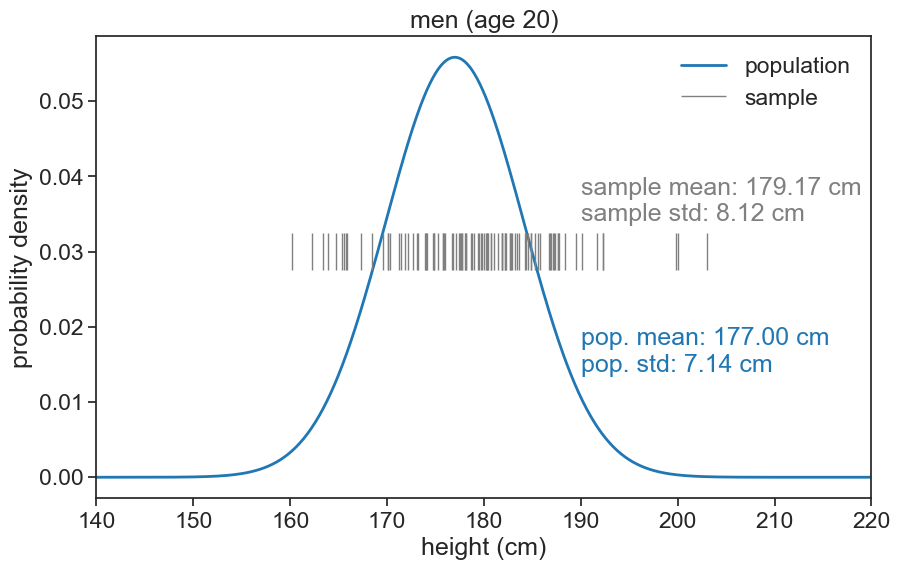

In [8]:
#| code-summary: "plot sample against population pdf"
height_list = np.arange(140, 220, 0.1)
pdf_boys = norm.pdf(height_list, loc=mu_boys, scale=sigma_boys)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(height_list, pdf_boys, lw=2, color='tab:blue', label='population')

ax.eventplot(sample100, orientation="horizontal", lineoffsets=0.03,
             linewidth=1, linelengths= 0.005,
             colors='gray', label='sample')

ax.text(190, 0.04, 
       f"sample mean: {sample100.mean():.2f} cm\nsample std: {sample100.std(ddof=1):.2f} cm", 
       ha='left', va='top', color='gray')

ax.text(190, 0.02, 
       f"pop. mean: {mu_boys:.2f} cm\npop. std: {sigma_boys:.2f} cm", 
       ha='left', va='top', color='tab:blue')

ax.legend(frameon=False)
ax.set(xlabel='height (cm)',
       ylabel='probability density',
       title="men (age 20)",
       xlim=(140, 220),
       );

In [9]:
#| code-summary: "calculate t-value"
t_value_scipy = ttest_1samp(sample100, popmean=mu_boys)
print(f"t-value: {t_value_scipy.statistic:.3f}")
print(f"p-value: {t_value_scipy.pvalue:.3f}")

t-value: 2.675
p-value: 0.009


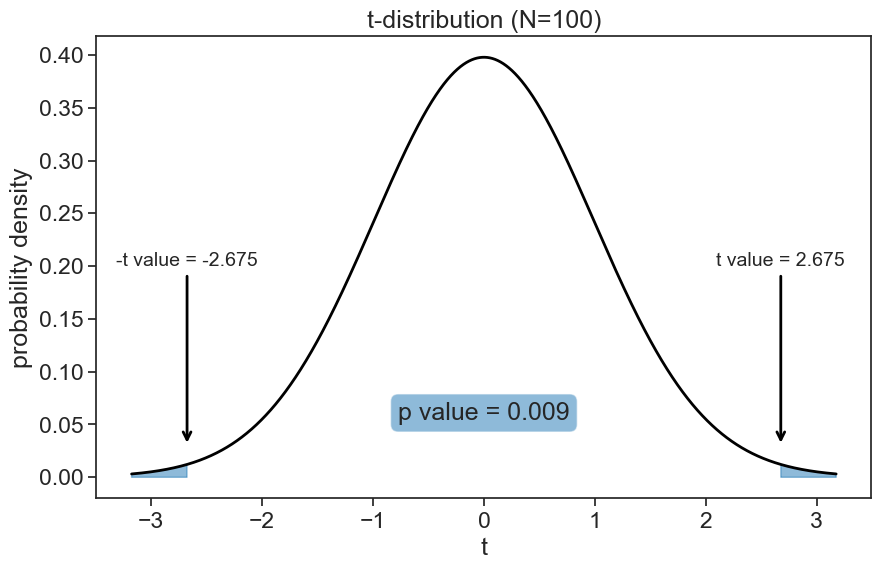

In [10]:
#| code-summary: "visualize t-distribution"
# degrees of freedom
dof = N - 1
fig, ax = plt.subplots(figsize=(10, 6))

t_array_min = np.round(t.ppf(0.001, dof),3)
t_array_max = np.round(t.ppf(0.999, dof),3)
t_array = np.arange(t_array_min, t_array_max, 0.001)

# annotate vertical array at t_value_scipy
ax.annotate(f"t value = {t_value_scipy.statistic:.3f}",
                        xy=(t_value_scipy.statistic, 0.03),
                        xytext=(t_value_scipy.statistic, 0.20),
                        fontsize=14,
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'),
                        ha='center')
ax.annotate(f"-t value = -{t_value_scipy.statistic:.3f}",
                        xy=(-t_value_scipy.statistic, 0.03),
                        xytext=(-t_value_scipy.statistic, 0.20),
                        fontsize=14,
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'),
                        ha='center')
# fill between t-distribution and normal distribution
ax.fill_between(t_array, t.pdf(t_array, dof),
                 where=(np.abs(t_array) > t_value_scipy.statistic),
                 color='tab:blue', alpha=0.5,
                 label='rejection region')

# write t_value_scipy.pvalue on the plot
ax.text(0, 0.05,
        f"p value = {t_value_scipy.pvalue:.3f}", 
        ha='center', va='bottom',
        bbox=dict(facecolor='tab:blue', alpha=0.5, boxstyle="round"))

ax.plot(t_array, t.pdf(t_array, dof),
       color='black', lw=2)

ax.set(xlabel='t',
       ylabel='probability density',
       title="t-distribution (N=100)",
       );

## Question 2

Can we say that the sampled men are taller than the general population?

## Hypotheses

- Null hypothesis: The sample mean is equal to the population mean.
- Alternative hypothesis: The sample mean is higher the population mean.
- Significance level: 0.05

The analysis is the same as before, but we will use a one-tailed test. The t statistic is the same, but the p value is smaller, since we account for a smaller portion of the total area of the pdf.

In [11]:
#| code-summary: "calculate t-value and p-value"
t_value_scipy = ttest_1samp(sample100, popmean=mu_boys, alternative='greater')
print(f"t-value: {t_value_scipy.statistic:.3f}")
print(f"p-value: {t_value_scipy.pvalue:.3f}")

t-value: 2.675
p-value: 0.004


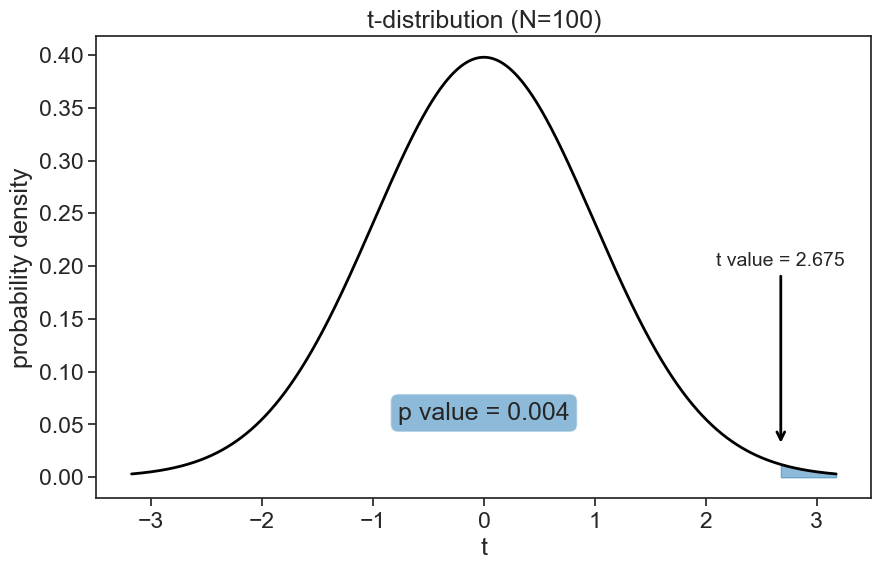

In [12]:
#| code-summary: "visualize t-distribution"
# degrees of freedom
dof = N - 1
fig, ax = plt.subplots(figsize=(10, 6))

t_array_min = np.round(t.ppf(0.001, dof),3)
t_array_max = np.round(t.ppf(0.999, dof),3)
t_array = np.arange(t_array_min, t_array_max, 0.001)

# annotate vertical array at t_value_scipy
ax.annotate(f"t value = {t_value_scipy.statistic:.3f}",
                        xy=(t_value_scipy.statistic, 0.03),
                        xytext=(t_value_scipy.statistic, 0.20),
                        fontsize=14,
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'),
                        ha='center')
# fill between t-distribution and normal distribution
ax.fill_between(t_array, t.pdf(t_array, dof),
                 where=(t_array > t_value_scipy.statistic),
                 color='tab:blue', alpha=0.5,
                 label='rejection region')

# write t_value_scipy.pvalue on the plot
ax.text(0, 0.05,
        f"p value = {t_value_scipy.pvalue:.3f}", 
        ha='center', va='bottom',
        bbox=dict(facecolor='tab:blue', alpha=0.5, boxstyle="round"))

ax.plot(t_array, t.pdf(t_array, dof),
       color='black', lw=2)

ax.set(xlabel='t',
       ylabel='probability density',
       title="t-distribution (N=100)",
       );

The answer is yes: the sampled men are significantly taller than the general population, since the p value is smaller than the significance level.